In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/file_formater.py
/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage/NonASD_058.jpg
/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage/NonASD_360.jpg
/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage/NonASD_137.jpg
/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage/NonASD_015.jpg
/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage/NonASD_033.jpg
/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage/NonASD_184.jpg
/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage/NonASD_154.jpg
/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage/NonASD_149.jpg
/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage/NonASD_321.jpg
/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage/NonASD_350.jpg
/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage/NonASD_045.jpg
/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage/NonASD_136.jpg
/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage/Non

Number of files in the folder:300


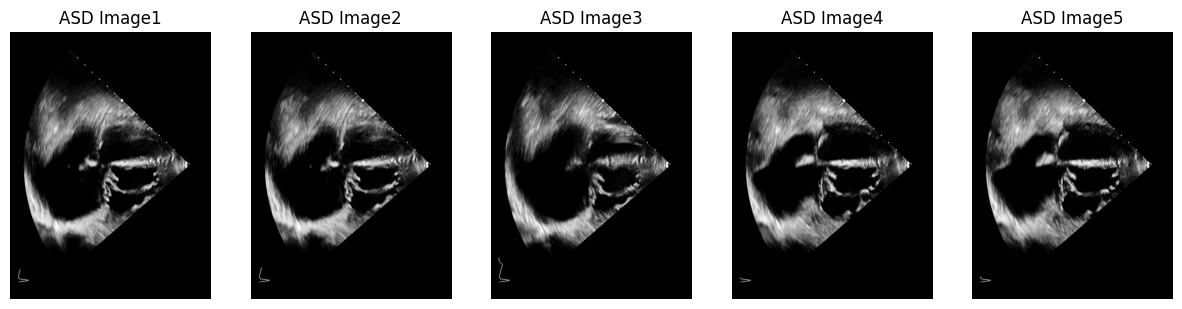

In [7]:
import os 
import matplotlib.pyplot as plt
import cv2

dataset_path = "/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/ASDimage"
images_files = sorted(os.listdir(dataset_path))
print(f'Number of files in the folder:{len(images_files)}')
images_files = images_files[:5]
plt.figure(figsize=(15,5))

for i, img_file in enumerate(images_files):
    img_path = os.path.join(dataset_path, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'ASD Image{i+1}')

plt.show()

Number of files in the folder:363


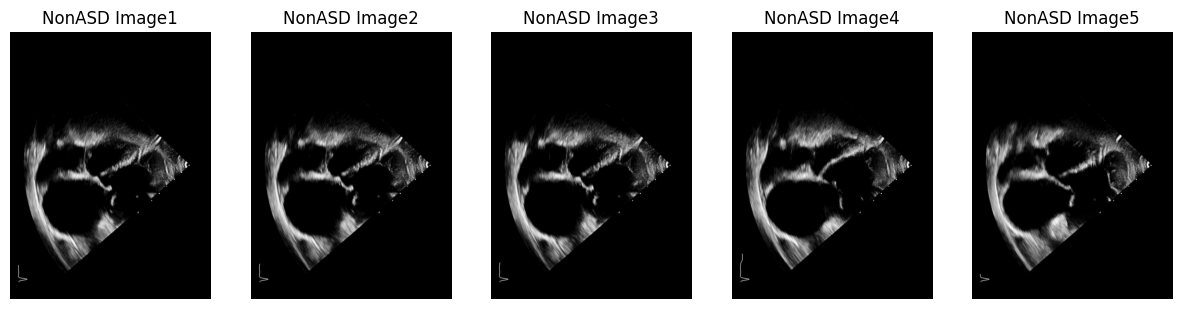

In [10]:
import os 
import matplotlib.pyplot as plt
import cv2

dataset_path = "/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage"
images_files = sorted(os.listdir(dataset_path))
print(f'Number of files in the folder:{len(images_files)}')
images_files = images_files[:5]
plt.figure(figsize=(15,5))

for i, img_file in enumerate(images_files):
    img_path = os.path.join(dataset_path, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'NonASD Image{i+1}')

plt.show()

In [11]:
import os
import shutil
from sklearn.model_selection import train_test_split

asd_path = "/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/ASDimage"
non_asd_path = "/kaggle/input/echo-asd-nonasd/EchoDataset_ASD/NonASDimage"
output_path = "/kaggle/working/dataset"  

In [14]:
train_asd_dir = os.path.join(output_path, "train/ASD")
train_non_asd_dir = os.path.join(output_path, "train/NonASD")
test_asd_dir = os.path.join(output_path, "test/ASD")
test_non_asd_dir = os.path.join(output_path, "test/NonASD")

In [16]:
os.makedirs(train_asd_dir, exist_ok=True)
os.makedirs(train_non_asd_dir, exist_ok=True)
os.makedirs(test_asd_dir, exist_ok=True)
os.makedirs(test_non_asd_dir, exist_ok=True)

In [17]:
asd_images = sorted(os.listdir(asd_path))
non_asd_images= sorted(os.listdir(non_asd_path))

In [19]:
asd_train, asd_test = train_test_split(asd_images, test_size=0.2, random_state=42)
non_asd_train, non_asd_test = train_test_split(non_asd_images,test_size=0.2, random_state=42)

In [20]:
for file in asd_train:
    shutil.copy(os.path.join(asd_path,file), os.path.join(train_asd_dir, file))
for file in asd_test:
    shutil.copy(os.path.join(asd_path,file),os.path.join(test_asd_dir, file))
for file in non_asd_train:
    shutil.copy(os.path.join(non_asd_path,file),os.path.join(train_non_asd_dir,file))
for file in non_asd_test:
    shutil.copy(os.path.join(non_asd_path,file),os.path.join(test_non_asd_dir,file))

In [25]:
datacheck = ["/kaggle/working/dataset/test/NonASD", "/kaggle/working/dataset/test/ASD"]
im_file1 = sorted(os.listdir(datacheck[0]))
im_file2 = sorted(os.listdir(datacheck[1]))
len(im_file1),len(im_file2)

/kaggle/working/dataset/test/NonASD


(73, 60)

In [26]:
import os
import torch
import torch.nn as nn
from transformers import ViTModel, ViTConfig
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from tqdm import tqdm

# Define dataset directory paths
DATASET_PATH = "/kaggle/working/dataset"
TRAIN_DIR = os.path.join(DATASET_PATH, "train")
TEST_DIR = os.path.join(DATASET_PATH, "test")

# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for ViT
    transforms.Grayscale(3),  # Convert grayscale to RGB
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset using ImageFolder
train_dataset = datasets.ImageFolder(root=TRAIN_DIR, transform=transform)
test_dataset = datasets.ImageFolder(root=TEST_DIR, transform=transform)

# Create DataLoaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Check class indices (ASD -> 0, NonASD -> 1)
print(train_dataset.class_to_idx)  # Example output: {'ASD': 0, 'NonASD': 1}


{'ASD': 0, 'NonASD': 1}


In [27]:
class ViTClassifier(nn.Module):
    def __init__(self, num_classes=2):
        super(ViTClassifier, self).__init__()
        config = ViTConfig(
            hidden_size=768,
            num_attention_heads=12,
            num_hidden_layers=12,
            intermediate_size=3072,
            image_size=224,
            patch_size=16,
            num_channels=3,  # RGB images
            num_labels=num_classes
        )
        self.vit = ViTModel(config)
        self.classifier = nn.Linear(config.hidden_size, num_classes)

    def forward(self, x):
        x = self.vit(x)['last_hidden_state']
        output = self.classifier(x[:, 0, :])  # Use CLS token embedding
        return output


In [28]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, optimizer, and loss function
model = ViTClassifier().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# Training function
def train(model, dataloader, optimizer, criterion, epochs=5):
    model.train()
    for epoch in range(epochs):
        loop = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}")
        total_loss = 0
        for images, labels in loop:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            loop.set_postfix(loss=total_loss / len(dataloader))
    print("Training complete.")

# Train the model
train(model, train_loader, optimizer, criterion)


Epoch 5/5: 100%|██████████| 17/17 [00:12<00:00,  1.32it/s, loss=0.688]

Training complete.


In [29]:
def evaluate(model, dataloader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Evaluate on test set
evaluate(model, test_loader)


Test Accuracy: 45.11%


In [34]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from transformers import ViTForImageClassification

# Define dataset path
DATASET_PATH = "/kaggle/working/dataset"
TRAIN_DIR = os.path.join(DATASET_PATH, "train")
TEST_DIR = os.path.join(DATASET_PATH, "test")

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for ViT
    transforms.Grayscale(3),  # Convert grayscale to RGB if needed
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.1, 0.1, 0.1], std=[0.1, 0.1, 0.1])  # Normalize
])

# Load datasets
train_dataset = datasets.ImageFolder(root=TRAIN_DIR, transform=transform)
test_dataset = datasets.ImageFolder(root=TEST_DIR, transform=transform)

# Create DataLoaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Check class indices (e.g., {'ASD': 0, 'NonASD': 1})
print(train_dataset.class_to_idx)


{'ASD': 0, 'NonASD': 1}


In [35]:
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Load pretrained ViT model
model_name = "google/vit-base-patch16-224-in21k"  # Pretrained on ImageNet-21k
model = ViTForImageClassification.from_pretrained(model_name, num_labels=2)

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [38]:
import torch.optim as optim
from tqdm import tqdm

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)

# Training function
def train(model, dataloader, optimizer, criterion, epochs=5):
    model.train()
    for epoch in range(epochs):
        loop = tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}")
        total_loss = 0
        for images, labels in loop:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images).logits  # Get logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            loop.set_postfix(loss=total_loss / len(dataloader))
    print("Training complete.")

# Train model
train(model, train_loader, optimizer, criterion)


Epoch 5/5: 100%|██████████| 17/17 [00:12<00:00,  1.31it/s, loss=0.0719]

Training complete.


In [39]:
def evaluate(model, dataloader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Evaluate model
evaluate(model, test_loader)


Test Accuracy: 93.98%
